In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from scipy import stats
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score , accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("C:/Users/Shahbaz Baig/Desktop/Titanic-Dataset.csv" , usecols = ['Age' , 'Fare' , 'Survived'])

In [4]:
df


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
df.dropna(inplace = True)

In [6]:
df.shape

(714, 3)

# **Binning**
## Three methods of binning :
 ### equal width binning
 ### equal frequency binning
 ### K-Means Binning

In [8]:
x = df.iloc[:,1:]
y = df['Survived']

In [9]:
x
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [10]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=76 , test_size = 0.2)

In [11]:
x_train 

,Age,Fare
397,46.0,26.0000
119,2.0,31.2750
80,22.0,9.0000
638,41.0,39.6875
263,40.0,0.0000
...,...,...
57,28.5,7.2292
350,23.0,9.2250
482,50.0,8.0500
491,21.0,7.2500


In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [14]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [15]:
accuracy_score(y_pred , y_test)

0.5804195804195804

In [16]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv = 10 , scoring = 'accuracy'))

0.6275039123630672

# Now i am gonna use discretizer

In [18]:
kbin_age = KBinsDiscretizer(n_bins = 10 , encode = 'ordinal' , strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins = 10 , encode = 'ordinal' , strategy='quantile')

In [19]:
#here i am using x_train by default
trf = ColumnTransformer([
    ('first' , kbin_age , [0]),
    ('second' , kbin_age , [1])
])
x_train

,Age,Fare
397,46.0,26.0000
119,2.0,31.2750
80,22.0,9.0000
638,41.0,39.6875
263,40.0,0.0000
...,...,...
57,28.5,7.2292
350,23.0,9.2250
482,50.0,8.0500
491,21.0,7.2500


In [20]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [21]:
trf.named_transformers_['second'].bin_edges_   # each interval has equal percentile of data

array([array([  0.    ,   7.75  ,   7.8958,   9.2167,  13.    ,  15.7417,
               26.    ,  29.125 ,  46.9   ,  79.2   , 512.3292])         ],
      dtype=object)

In [22]:
x_train_trf[:,1]

array([6., 7., 2., 7., 0., 7., 5., 9., 8., 4., 6., 9., 8., 1., 4., 6., 5.,
       0., 4., 1., 8., 2., 5., 3., 4., 5., 3., 2., 5., 6., 7., 5., 5., 6.,
       3., 8., 6., 9., 7., 0., 3., 3., 9., 2., 8., 3., 0., 4., 7., 6., 8.,
       6., 7., 4., 5., 2., 2., 3., 9., 9., 4., 9., 3., 5., 2., 1., 5., 4.,
       6., 0., 2., 5., 1., 7., 6., 3., 4., 1., 7., 4., 0., 3., 0., 9., 4.,
       1., 8., 2., 4., 5., 3., 8., 7., 5., 4., 4., 4., 5., 2., 2., 7., 4.,
       6., 1., 8., 2., 0., 4., 9., 1., 7., 9., 2., 0., 2., 8., 2., 8., 7.,
       2., 3., 8., 0., 4., 2., 3., 4., 2., 0., 6., 9., 6., 7., 6., 0., 3.,
       2., 9., 5., 2., 0., 5., 6., 3., 3., 0., 2., 7., 3., 0., 5., 8., 0.,
       3., 6., 7., 8., 3., 9., 4., 2., 9., 0., 0., 3., 4., 5., 4., 3., 2.,
       8., 0., 3., 0., 7., 6., 6., 6., 9., 8., 7., 5., 5., 2., 3., 0., 9.,
       9., 2., 4., 5., 0., 2., 2., 3., 5., 1., 8., 7., 4., 6., 7., 9., 1.,
       1., 3., 1., 8., 8., 4., 0., 8., 2., 4., 3., 4., 6., 6., 5., 9., 4.,
       1., 2., 7., 0., 8.

In [23]:
output = pd.DataFrame({
    'age' : x_train['Age'],
    'age_trf' : x_train_trf[:,0],
    'fare' : x_train['Fare'],
    'fare_trf' : x_train_trf[:,1]
})
output

,age,age_trf,fare,fare_trf
397,46.0,8.0,26.0000,6.0
119,2.0,0.0,31.2750,7.0
80,22.0,3.0,9.0000,2.0
638,41.0,7.0,39.6875,7.0
263,40.0,7.0,0.0000,0.0
...,...,...,...,...
57,28.5,4.0,7.2292,0.0
350,23.0,3.0,9.2250,3.0
482,50.0,9.0,8.0500,2.0
491,21.0,2.0,7.2500,0.0


In [24]:
output['age_trf'].describe()


count    571.000000
mean       4.584939
std        2.879032
min        0.000000
25%        2.000000
50%        5.000000
75%        7.000000
max        9.000000
Name: age_trf, dtype: float64

In [25]:
output['age_interval'] = pd.cut(x = x_train['Age'] , bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_interval'] = pd.cut(x = x_train['Fare'] , bins = trf.named_transformers_['second'].bin_edges_[0].tolist()) # pd.cut will convert the continuos data into bins interval provided thus make it categorical more like

In [26]:
output

,age,age_trf,fare,fare_trf,age_interval,fare_interval
397,46.0,8.0,26.0000,6.0,"(42.0, 50.0]","(15.742, 26.0]"
119,2.0,0.0,31.2750,7.0,"(0.42, 13.0]","(29.125, 46.9]"
80,22.0,3.0,9.0000,2.0,"(19.0, 22.0]","(7.896, 9.217]"
638,41.0,7.0,39.6875,7.0,"(36.0, 42.0]","(29.125, 46.9]"
263,40.0,7.0,0.0000,0.0,"(36.0, 42.0]",NaN
...,...,...,...,...,...,...
57,28.5,4.0,7.2292,0.0,"(25.0, 29.0]","(0.0, 7.75]"
350,23.0,3.0,9.2250,3.0,"(22.0, 25.0]","(9.217, 13.0]"
482,50.0,9.0,8.0500,2.0,"(42.0, 50.0]","(7.896, 9.217]"
491,21.0,2.0,7.2500,0.0,"(19.0, 22.0]","(0.0, 7.75]"


In [27]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)

DecisionTreeClassifier()

In [28]:
y_pred_trf=clf.predict(x_test_trf)

In [29]:
accuracy_score(y_pred_trf,y_test)

0.6013986013986014

In [30]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(clf,x_trf,y,cv=10,scoring = 'accuracy'))

0.682140062597809

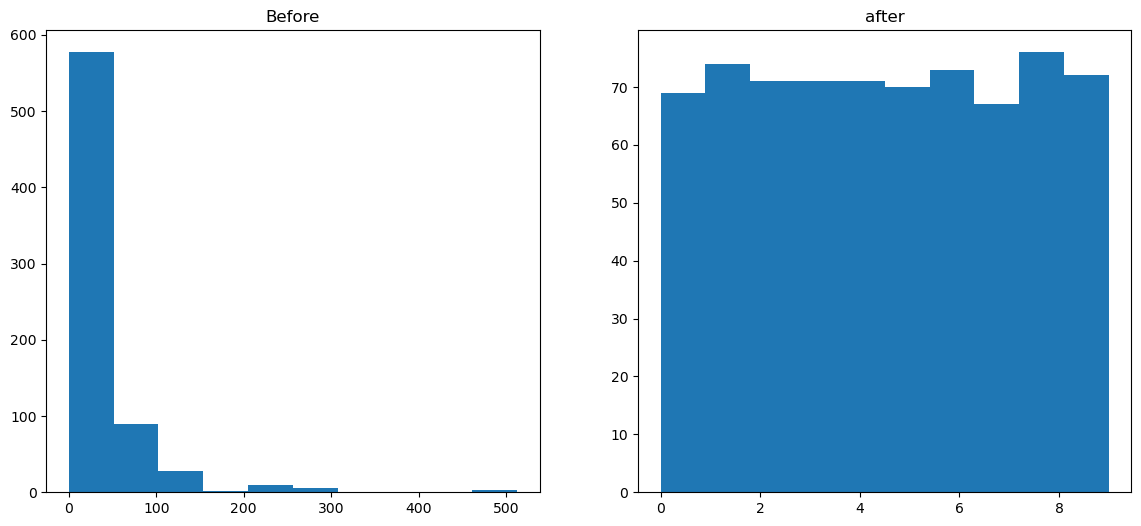

In [31]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.hist(x['Fare'])
plt.title('Before')
plt.subplot(122)
plt.hist(x_trf[:,1:])
plt.title('after')
plt.show()   # so you see it normalize or equally distribute the data

In [32]:
x

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


# **BINARIZATION OF DATA**

In [34]:
from sklearn.preprocessing import Binarizer

In [35]:
df = pd.read_csv("C:/Users/Shahbaz Baig/Desktop/Titanic-Dataset.csv" , usecols = ['Age' , 'Fare' , 'Survived',"SibSp" , "Parch"])

In [36]:
df

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500
...,...,...,...,...,...
886,0,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,0,NaN,1,2,23.4500
889,1,26.0,0,0,30.0000


In [37]:
df['family'] = df['SibSp'] + df['Parch']

In [38]:
df

,Survived,Age,SibSp,Parch,Fare,family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,0
888,0,NaN,1,2,23.4500,3
889,1,26.0,0,0,30.0000,0


In [39]:
df.dropna(inplace= True)

In [85]:
df.drop(['Parch'], inplace=True, axis=1)

In [89]:
df

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0
...,...,...,...,...
885,0,39.0,29.1250,5
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
889,1,26.0,30.0000,0


In [91]:
x = df.iloc[:,1:]
y = df['Survived']

In [93]:
y
x


,Age,Fare,family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
885,39.0,29.1250,5
886,27.0,13.0000,0
887,19.0,30.0000,0
889,26.0,30.0000,0


In [95]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 102)

In [97]:
x_train

,Age,Fare,family
72,21.0,73.5000,0
735,28.5,16.1000,0
798,30.0,7.2292,0
377,27.0,211.5000,2
615,24.0,65.0000,3
...,...,...,...
60,22.0,7.2292,0
786,18.0,7.4958,0
302,19.0,0.0000,0
743,24.0,16.1000,1


In [99]:
from sklearn.preprocessing import Binarizer

In [107]:
trf = ColumnTransformer([
    ('bin' , Binarizer(copy = False), ['family'])
],remainder = 'passthrough')


In [109]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [111]:
x_train_trf

array([[  0.    ,  21.    ,  73.5   ],
       [  0.    ,  28.5   ,  16.1   ],
       [  0.    ,  30.    ,   7.2292],
       ...,
       [  0.    ,  19.    ,   0.    ],
       [  1.    ,  24.    ,  16.1   ],
       [  1.    ,  40.    , 134.5   ]])

In [113]:
x_train_trf = pd.DataFrame(x_train_trf , columns = ['family' , 'Age' , 'Fare'])

In [115]:
x_train_trf

,family,Age,Fare
0,0.0,21.0,73.5000
1,0.0,28.5,16.1000
2,0.0,30.0,7.2292
3,1.0,27.0,211.5000
4,1.0,24.0,65.0000
...,...,...,...
566,0.0,22.0,7.2292
567,0.0,18.0,7.4958
568,0.0,19.0,0.0000
569,1.0,24.0,16.1000
